# <center> Constraint (SMT) Solvers and Deep Neural Networks - Assignment 1
## <center> Soham Pyne (MDS202148) <br><br>

#### Directories 

In [50]:
import os
import warnings
import torch
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import random
import numpy as np

from torch import nn
from torch.utils.data import Dataset, DataLoader
#import sklearn
#from sklearn.model_selection import train_test_split

#### Importing the data

In [51]:
# Download and Save MNIST 
mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform = transforms.ToTensor())
#data_test = MNIST('~/mnist_data', train=False, download=True)
len(mnist)
input_size = 784

#### Exercise One: 

* Download/install the MNIST dataset. 
It is available within pytorch itself as torchvision.datasets.MNIST. You can use this to directly load the MNIST data into a format that works well with pytorch. This dataset is also available in tensorflow.
* Once you have installed MNIST, chose 4 images at random from the
dataset, and plot them usign matplotlib.pyplot.imshow along
with their labels. 
This function can take a 2d array of values between 0 and 1, interpret 0 as black and 1 as white

* plot the resulting greyscale image.

The label of the image is: 2


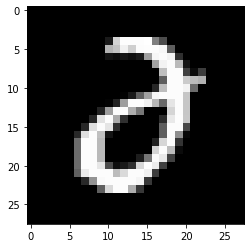

The label of the image is: 9


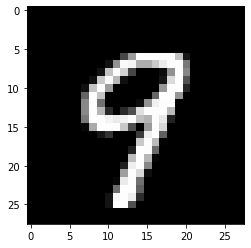

The label of the image is: 3


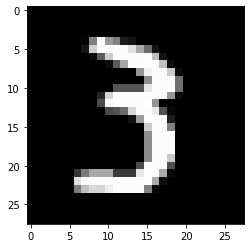

The label of the image is: 5


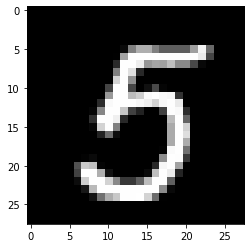

In [52]:
import matplotlib.pyplot as plt
list1 = [i for i in range(len(mnist))]
def randomImageSelectionFromMNIST(k):
    for i in range(k):
        p = random.choice(list1)
        random_image = mnist[p][0].squeeze()
        random_image_label = mnist[p][1]
        plt.imshow(random_image,cmap='gray')
        print("The label of the image is:", random_image_label)
        plt.show(block=True)
        
randomImageSelectionFromMNIST(4)

#### Exercise Two: Training  a simple DNN

* Construct a very simple DNN with a single input layer, and a single
output layer.
* Each input will correspond to each pixel. Since there are $784$ pixels, the
input will be a $784$ dimensional vector, with the value of the $(i, j)$ pixel
going to the $28 ∗ i + j$ component of the vector.
* There will be $10$ outputs, corresponding to the $10$ possible digits. Each
output will represent a score the neural network gives to each digit. The
higher the score for an output $i$, the more confident the neural network is
that the image is of the digit $i$.
* Use SoftMax to convert the output values into a probability distribution, and then use Cross-Entropy Loss as a loss function. 
* Split the images into a training set and a testing set according to a $60% - 40%$ ratio. 
* Train the network on the training set, and then see how many of the test images
the DNN recognizes correctly. 
* Plot the loss vs epochs curve.
* Also, pick $4$ images from the dataset at random, plot them, and also plot the output of the network along with the actual label for each image.

In [53]:
class DNN1(nn.Module):  # A single input output layer DNN (784 ----> 10)
    def __init__(self):
        super().__init__()
        self.input_size = input_size
        self.network = nn.Sequential(nn.Linear(784,10),nn.Softmax(dim=1)) 
               
    def forward(self,x):
        x = x.view(-1, self.input_size)
        return self.network(x)
        
        return x

#### Exercise Three: Different DNN architechture

Repeat the previous question for a few, more complicated DNN
architectures:
1. A ReLU DNN with a single hidden layer of size 50.
2. A ReLU DNN with 3 hidden layers of size 300, 100 and 50.
3. The same DNN as before, but with a different activation function of
your choosing (not ReLU).

In [54]:
class DNN2(nn.Module):  #A ReLU DNN with a single hidden layer of size 50 
    def __init__(self):
        super().__init__()
        self.input_size = input_size
        self.network = nn.Sequential(nn.Linear(784,50),nn.ReLU(),nn.Linear(50,10),nn.Softmax(dim=1))
        
    def forward(self,x):
        x = x.view(-1, self.input_size)
        return self.network(x)
        
        return x

In [55]:
class DNN3(nn.Module):  #A ReLU DNN with 3 hidden layers of size 300, 100 and 50.
    def __init__(self):
        super().__init__()
        self.input_size = input_size
        self.network = nn.Sequential(nn.Linear(784,300),nn.ReLU(),nn.Linear(300,100),nn.ReLU(),nn.Linear(100,50),nn.ReLU(),nn.Linear(50,10),nn.Softmax(dim=1))
        
    def forward(self,x):
        x = x.view(-1, self.input_size)
        return self.network(x)
        return x

In [56]:
class DNN4(nn.Module):  #A ReLU DNN with 3 hidden layers of size 300, 100 and 5 with sigmoid as an activation function.
    def __init__(self):
        super().__init__()
        self.input_size = input_size
        self.network = nn.Sequential(nn.Linear(784,300),nn.Sigmoid(),nn.Linear(300,100),nn.Sigmoid(),nn.Linear(100,50),nn.Sigmoid(),nn.Linear(50,10),nn.Softmax(dim=1))
        
    def forward(self,x):
        x = x.view(-1, self.input_size)
        return self.network(x)
        return x

In [57]:
model1 = DNN1()
model2 = DNN2()
model3 = DNN3()
model4 = DNN4()

In [58]:
def train_test_split(data,split_train = 0.70):
    trainSize = int(len(mnist)*split_train)
    validationSize = len(mnist) - trainSize
    
    trainData, valData = torch.utils.data.random_split(mnist, [trainSize, validationSize])
    
    return trainData,valData

trainMNIST , validationMNIST = train_test_split(mnist,0.60)

len(trainMNIST), len(validationMNIST) # Number of Images in each set

(36000, 24000)

In [59]:
DLtrainMNIST = DataLoader(trainMNIST, batch_size=32, shuffle=True)
DLvalMNIST = DataLoader(validationMNIST, batch_size=32, shuffle=True)

len(DLtrainMNIST), len(DLvalMNIST) # Number of Batches in each set

(1125, 750)

In [60]:
def trainModel(DLtraindata,DLvaldata,model):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)
    
    train_loss = []
    val_loss = []
    train_accuracy = []
    val_accuracy = []
    
    for epoch in range(1,250):
        training_loss = 0
        validation_loss = 0
        training_accuracy = 0
        validation_accuracy = 0
        for i,(inputs,targets) in enumerate(DLtraindata):
            model.train()
            inputs = inputs.squeeze()
            
            flattened_input = torch.flatten(inputs, start_dim=1)
        
            optimizer.zero_grad()
            output = model(flattened_input)
            _, preds = torch.max(output.data, 1)
            loss = criterion(output,targets)
            loss.backward()
            optimizer.step()
            
            training_loss += loss.item() * flattened_input.size(0)
            training_accuracy += torch.sum(preds == targets.data)

            # more code here
        
        train_loss.append(training_loss/len(trainMNIST))
        train_accuracy.append(training_accuracy/len(trainMNIST))
        
        for i,(inputs,targets) in enumerate(DLvaldata):
            model.eval()
            inputs = inputs.squeeze()
            
            flattened_input = torch.flatten(inputs, start_dim=1)
        
            output = model(flattened_input)
            _, preds = torch.max(output.data, 1)
            loss = criterion(output,targets)
            
            validation_loss += loss.item() * flattened_input.size(0)
            validation_accuracy += torch.sum(preds == targets.data)

            # more code here
        
        val_loss.append(validation_loss/len(validationMNIST))
        val_accuracy.append(validation_accuracy/len(validationMNIST))
        
    return train_loss,val_loss,train_accuracy,val_accuracy,inputs,targets,preds


#### The Neural network is the single input output layer. The number of epochs is 250.

In [61]:
train_loss,val_loss , train_accuracy,val_accuracy,inputs,targets,preds= trainModel(DLtrainMNIST,DLvalMNIST, model1)

In [62]:
print("train accuracy is {:.4f}, valid accuracy is {:.4f}".format(train_accuracy[-1].item(),val_accuracy[-1].item()))

train accuracy is 0.9452, valid accuracy is 0.9232


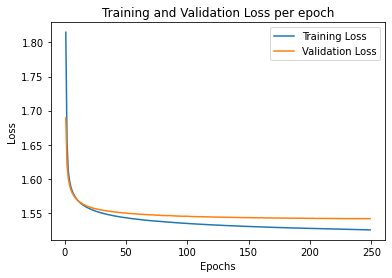

In [63]:
epochs = [i for i in range(1,250)]
plt.plot(epochs,train_loss,label = "Training Loss")
plt.plot(epochs,val_loss,label = "Validation Loss")
plt.title('Training and Validation Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

The label of the image is: True:9, Predicted:9


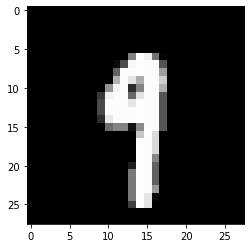

The label of the image is: True:7, Predicted:2


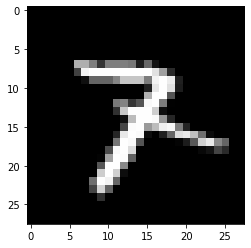

The label of the image is: True:9, Predicted:9


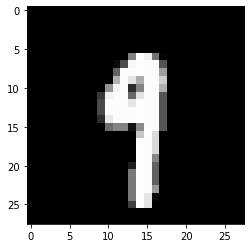

The label of the image is: True:7, Predicted:7


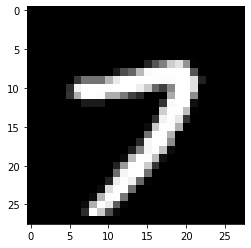

In [64]:
list1 = [i for i in range(len(inputs))]
def randomImageSelectionFromMNIST(k):
    for i in range(k):
        p = random.choice(list1)
        random_image = inputs[p]
        random_image_label = 'True:{}, Predicted:{}'.format(targets[p], preds[p])
        plt.imshow(random_image,cmap='gray')
        print("The label of the image is:", random_image_label)
        plt.show(block=True)
        
randomImageSelectionFromMNIST(4)

#### A single hidden layer of size 50. The number of epochs is 250.

In [65]:
train_loss,val_loss , train_accuracy,val_accuracy,inputs,targets,preds= trainModel(DLtrainMNIST,DLvalMNIST, model2)

In [66]:
print("train accuracy is {:.4f}, valid accuracy is {:.4f}".format(train_accuracy[-1].item(),val_accuracy[-1].item()))

train accuracy is 0.9882, valid accuracy is 0.9651


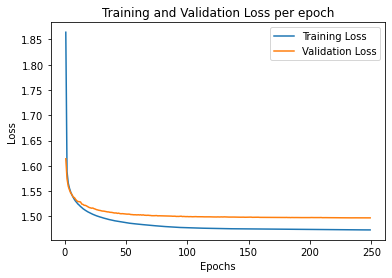

In [67]:
epochs = [i for i in range(1,250)]
plt.plot(epochs,train_loss,label = "Training Loss")
plt.plot(epochs,val_loss,label = "Validation Loss")
plt.title('Training and Validation Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

The label of the image is: True:0, Predicted:0


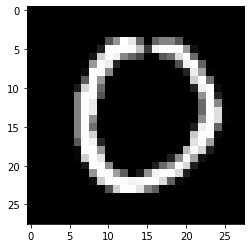

The label of the image is: True:7, Predicted:7


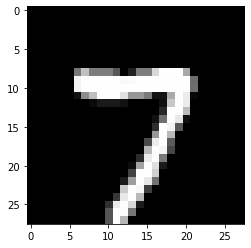

The label of the image is: True:4, Predicted:4


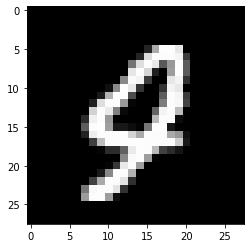

The label of the image is: True:4, Predicted:4


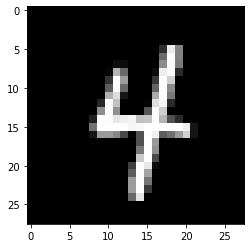

In [68]:
list1 = [i for i in range(len(inputs))]
def randomImageSelectionFromMNIST(k):
    for i in range(k):
        p = random.choice(list1)
        random_image = inputs[p]
        random_image_label = 'True:{}, Predicted:{}'.format(targets[p], preds[p])
        plt.imshow(random_image,cmap='gray')
        print("The label of the image is:", random_image_label)
        plt.show(block=True)
        
randomImageSelectionFromMNIST(4)

#### The neural network has three hidden layer consist of 300,100,50 neurons. The number of epochs is 250.

In [69]:
train_loss,val_loss , train_accuracy,val_accuracy,inputs,targets,preds= trainModel(DLtrainMNIST,DLvalMNIST, model3)

In [70]:
print("train accuracy is {:.4f}, valid accuracy is {:.4f}".format(train_accuracy[-1].item(),val_accuracy[-1].item()))

train accuracy is 0.9941, valid accuracy is 0.9743


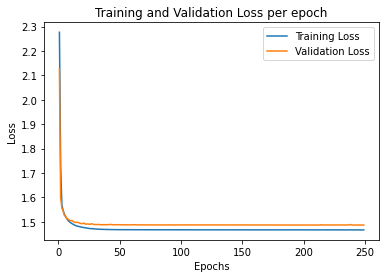

In [71]:
epochs = [i for i in range(1,250)]
plt.plot(epochs,train_loss,label = "Training Loss")
plt.plot(epochs,val_loss,label = "Validation Loss")
plt.title('Training and Validation Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

The label of the image is: True:6, Predicted:6


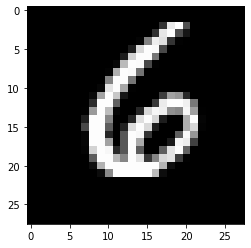

The label of the image is: True:0, Predicted:0


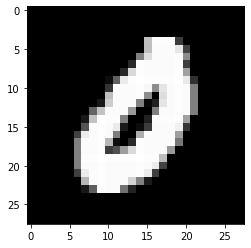

The label of the image is: True:6, Predicted:6


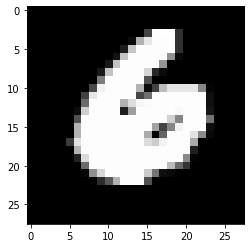

The label of the image is: True:6, Predicted:6


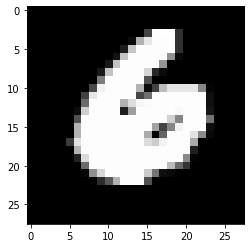

In [72]:
list1 = [i for i in range(len(inputs))]
def randomImageSelectionFromMNIST(k):
    for i in range(k):
        p = random.choice(list1)
        random_image = inputs[p]
        random_image_label = 'True:{}, Predicted:{}'.format(targets[p], preds[p])
        plt.imshow(random_image,cmap='gray')
        print("The label of the image is:", random_image_label)
        plt.show(block=True)
        
randomImageSelectionFromMNIST(4)

#### Same network with three different hidden layer as above but with sigmoid as activation function. The number of epochs is 250. 

In [73]:
train_loss,val_loss , train_accuracy,val_accuracy,inputs,targets,preds= trainModel(DLtrainMNIST,DLvalMNIST, model4)

In [74]:
print("train accuracy is {:.4f}, valid accuracy is {:.4f}".format(train_accuracy[-1].item(),val_accuracy[-1].item()))

train accuracy is 0.9860, valid accuracy is 0.9593


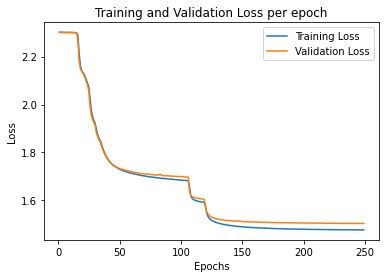

In [75]:
epochs = [i for i in range(1,250)]
plt.plot(epochs,train_loss,label = "Training Loss")
plt.plot(epochs,val_loss,label = "Validation Loss")
plt.title('Training and Validation Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

The label of the image is: True:1, Predicted:1


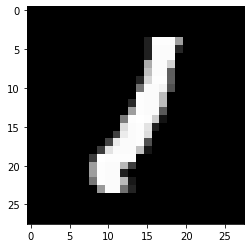

The label of the image is: True:6, Predicted:6


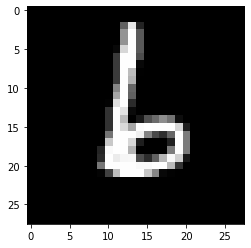

The label of the image is: True:8, Predicted:8


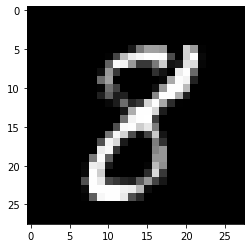

The label of the image is: True:4, Predicted:9


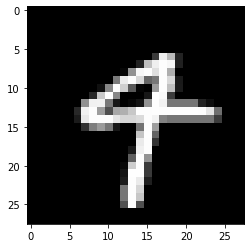

In [76]:
list1 = [i for i in range(len(inputs))]
def randomImageSelectionFromMNIST(k):
    for i in range(k):
        p = random.choice(list1)
        random_image = inputs[p]
        random_image_label = 'True:{}, Predicted:{}'.format(targets[p], preds[p])
        plt.imshow(random_image,cmap='gray')
        print("The label of the image is:", random_image_label)
        plt.show(block=True)
        
randomImageSelectionFromMNIST(4)

#### Exercise Four: Robustness against noise

Here we will generate some random noise and add it to each image, and
then see how much of the accuracy of the network is maintained.
Generate noise for each by sampling from a uniform distribution over
$[0, 1]$. Thus, you will get a noise vector $\overrightarrow{n}$ .
Now, fix some ϵ. Then for each input image $\overrightarrow{x}$ , generate a noise vector
$\overrightarrow{n}$ and calculate a perturbed input
$\overrightarrow{x}′ = \overrightarrow{x} + \epsilon\overrightarrow{n}$ . Thus, for each $\epsilon$, you
can generate a dataset of perturbed inputs. Then you can test the
network on these inputs, and count the percentage of images it
recognizes correctly.
Do the above for various values of ϵ to plot a curve of ϵ versus accuracy.
If it is too computationally expensive to use the entire dataset of $60000+$
images for each $\epsilon$, choose a subset of the dataset with at-least $1000$
images and measure the accuracy on these. For this exercise, pick the
best performing network from the ones trained in the previous $2$
exercises.

In [96]:
n = torch.rand(784)
mnist_noise = []
def dataNoise(data,epsilon):
    for i in range(len(data)):
        image,label = data[i]
        image_noise = image.flatten()
        image_noise = image_noise + epsilon * n
        image_noise = torch.clamp(image_noise, min= 0 , max = 1)
        image_noise = image_noise.view(1,-1,28,28)
        mnist_noise.append((image_noise,label))
    return mnist_noise     

In [97]:
mnist_noise = dataNoise(mnist,0.03)
len(mnist_noise)

60000

In [98]:
mnist_noise[1][0].size()

torch.Size([1, 1, 28, 28])

In [99]:
DLtestdata = DataLoader(mnist_noise, batch_size=32, shuffle=True)
len(DLtestdata)

1875

In [100]:
def test_nn(DLtestdata,model):
    criterion = torch.nn.CrossEntropyLoss()
    test_loss = []
    test_accuracy = []
    testing_loss = 0
    testing_accuracy = 0 
    total_n = 0
    for i, data in enumerate(DLtestdata):
        inputs, targets = data
        model.eval()
        inputs = inputs.squeeze()
        
        flattened_input = torch.flatten(inputs, start_dim=1)

        output = model(flattened_input)
        _, preds = torch.max(output.data, 1)
        loss = criterion(output,targets)
        
        total_n += flattened_input.size(0)
        testing_loss += loss.item() * flattened_input.size(0)
        testing_accuracy += torch.sum(preds == targets.data)

    test_loss.append(testing_loss/total_n)
    test_accuracy.append(testing_accuracy/total_n)
    
    return test_loss, test_accuracy

In [101]:
# test_loss,test_accuracy = test_nn(DLtestdata,model3)
# test_accuracy[0].item()
eps = np.linspace(0.01,1,num = 30)
list_accuracy = []
for i in eps:
    mnist_noise = dataNoise(mnist,i)
    DLtestmnist = DataLoader(mnist_noise, batch_size=32, shuffle=True)
    test_loss,test_accuracy = test_nn(DLtestmnist,model3)
    list_accuracy.append(test_accuracy[0].item())
    print("The test accuracy is given by {:.4f}".format(test_accuracy[0].item()))


The test accuracy is given by 0.9913
The test accuracy is given by 0.9913
The test accuracy is given by 0.9911
The test accuracy is given by 0.9907
The test accuracy is given by 0.9897
The test accuracy is given by 0.9877
The test accuracy is given by 0.9843
The test accuracy is given by 0.9786
The test accuracy is given by 0.9700
The test accuracy is given by 0.9587
The test accuracy is given by 0.9457
The test accuracy is given by 0.9313
The test accuracy is given by 0.9161
The test accuracy is given by 0.9002
The test accuracy is given by 0.8837
The test accuracy is given by 0.8665
The test accuracy is given by 0.8489
The test accuracy is given by 0.8308
The test accuracy is given by 0.8126
The test accuracy is given by 0.7943
The test accuracy is given by 0.7760
The test accuracy is given by 0.7578
The test accuracy is given by 0.7400
The test accuracy is given by 0.7225
The test accuracy is given by 0.7056
The test accuracy is given by 0.6892
The test accuracy is given by 0.6734
T

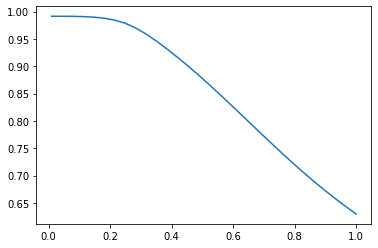

In [102]:
plt.plot(eps,list_accuracy)
plt.show()

#### Exercise Five: Permuting the images

Generate some random permutation of the pixels of the image, and save
it to some file. You can use a dict to represent the permutation, and
then use pickling to store the dict to some file. Let’s call this $\phi$.
Pick $4$ images from the dataset, apply $\phi$ to them, and plot them along
with the label. Can you, as a human, tell what digits these permuted
images are representing$?$
Now, pick the network architecture from exercise $2$ and $3$ that performed
the best, and re-train it on the dataset of permuted images. That is,
during training, instead of passing the image $ϕ(\overrightarrow{x})$ as the input example,
use $ϕ(\overrightarrow{x})$. Plot the loss vs epochs curve.
Test the accuracy of the resulting network as follows: For each image $ϕ(\overrightarrow{x})$ ,
pass $ϕ(\overrightarrow{x})$ to the network, and see if the network’s classification matches
with the label on $ϕ(\overrightarrow{x})$ . Count the percentage of such images where the
network is ”correct”.

In [84]:
fixed_perm = torch.randperm(784) #Here we are fixing a permutation and making a new permuted dataset.
mnist1 = []
for i in range(len(mnist)):
    img, lab = mnist[i]
    img_perm = img.view(-1, 28*28).clone()
    img_perm = img_perm[:,fixed_perm]
    img_perm = img_perm.view(1,-1,28,28)
    mnist1.append((img_perm, lab))

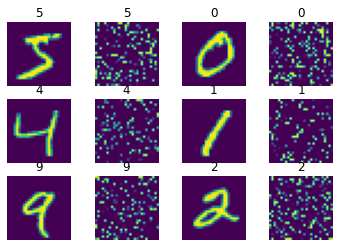

In [85]:
fixed_perm = torch.randperm(784) # Fix a permutation of the image pixels; We apply the same permutation to all images

def Permute(fixed_perm,k):
    for i in range(k):
        image, label = mnist[i][0], mnist[i][1]
        image_perm = image.view(-1, 28*28).clone()
        image_perm = image_perm[:, fixed_perm]
        image_perm = image_perm.view(-1, 1, 28, 28)
        label = label
        plt.subplot(3,4, 2*i + 1)
        plt.imshow(image.squeeze().numpy())
        plt.axis('off')
        plt.title(label)
        plt.subplot(3, 4, 2*i+2)
        plt.imshow(image_perm.squeeze().numpy())
        plt.axis('off')
        plt.title(label)
    
Permute(fixed_perm,6)

In [86]:
PtrainMNIST , PvalidationMNIST = train_test_split(mnist1,0.60)
len(PtrainMNIST), len(PvalidationMNIST)
PDLtrainMNIST = DataLoader(PtrainMNIST, batch_size=32, shuffle=True)
PDLvalMNIST = DataLoader(PvalidationMNIST, batch_size=32, shuffle=True)

len(PDLtrainMNIST), len(PDLvalMNIST) # Number of Batches in each set
train_loss,val_loss , train_accuracy,val_accuracy,inputs,targets,preds= trainModel(PDLtrainMNIST,PDLvalMNIST, model3)

In [87]:
print("train accuracy is {:.4f}, valid accuracy is {:.4f}".format(train_accuracy[-1].item(),val_accuracy[-1].item()))

train accuracy is 0.9949, valid accuracy is 0.9862


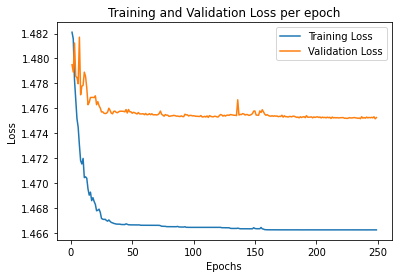

In [88]:
epochs = [i for i in range(1,250)]
plt.plot(epochs,train_loss,label = "Training Loss")
plt.plot(epochs,val_loss,label = "Validation Loss")
plt.title('Training and Validation Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

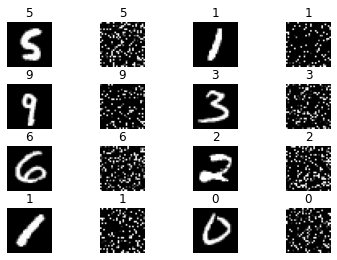

In [89]:
def disp_normal_permuted_images(mnist_imgs, perm_imgs, img_num): 
    ind_show = random.sample(list(range(len(mnist_imgs))), img_num) # Sampling 4 random indices from training dataset

    total = 2*len(ind_show)
    if np.sqrt(2*img_num) != int(np.sqrt(2*img_num)):
        col = int(np.sqrt(2*img_num)) + 1 
    else:
        col = int(np.sqrt(2*img_num))
    rows = total // col
    if total % col != 0:
        rows += 1

    fig = plt.figure(1)
    for k in range(total):
        if k % 2 == 0:
            ax = fig.add_subplot(rows,col,k + 1)
            ax.title.set_text(mnist_imgs[ind_show[k//2]][1])
            ax.axis('off')
            ax.imshow(mnist_imgs[ind_show[k//2]][0].reshape((28,28)), cmap='gray')
        else:
            ax = fig.add_subplot(rows,col,k + 1)
            ax.title.set_text(perm_imgs[ind_show[k//2]][1])
            ax.axis('off')
            ax.imshow(perm_imgs[ind_show[k//2]][0].reshape((28,28)), cmap='gray')

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()

disp_normal_permuted_images(mnist, mnist1, 8)

In [90]:
random.sample(list(range(len(mnist))), 4)

[341, 15311, 14751, 31474]

In [91]:
# list1 = [i for i in range(len(mnist1))]
# def randomImageSelectionFromPMNIST(k):
#     for i in range(k):
#         p = random.choice(list1)
#         random_image = mnist[p][0].squeeze()
#         random_imageP = mnist1[p][0].squeeze()
#         random_image_label = mnist[p][1]
#         random_image_labelP = mnist1[p][1]
#         plt.imshow(random_image,cmap='gray')
#         print("The label of the image is:", random_image_label)
#         plt.imshow(random_imageP,cmap='gray')
#         print("The label of the permuted image is:", random_image_labelP)
#         plt.show(block=True)
        
# randomImageSelectionFromPMNIST(4)

In [92]:
# fixed_perm = torch.randperm(784)
# mnist1 = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform = transforms.ToTensor())
# for i in range(len(mnist)):
#     img1 = mnist1[i][0]
#     img1 = img1.view(-1, 28*28).clone()
#     img1 = img1[:,fixed_perm]
#     img1 = img1.view(-1, 1, 28, 28)
#     m_list = list(mnist1[i])
#     m_list[0] = img1
#     mnist1[i] = tuple(m_list)
    

In [93]:
# #epsilon = 0.1
# #n = torch.rand(32,784)
# class DNN5(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.input_size = input_size
#         self.network = nn.Sequential(nn.Linear(784,50),nn.ReLU(),nn.Linear(50,10),nn.Softmax(dim=1))
        
#     def forward(self,x):
#         x = x + epsilon * torch.rand(32,784)
#         x = x.view(-1, self.input_size)
#         return self.network(x)
#         return x
    
# model5 = DNN5()

In [94]:
# e = np.linspace(0.001,0.1,num = 5)
# Noise_val_accuracy = []
# for epsilon in e:
#     train_loss,val_loss , train_accuracy,val_accuracy,inputs,targets,preds= trainModel(DLtrainMNIST,DLvalMNIST, model5)
#     Noise_val_accuracy.append((train_accuracy,val_accuracy))
#     print("train accuracy is {:.4f}, valid accuracy is {:.4f} with epsilon equals {:.4f}".format(train_accuracy[-1].item(),val_accuracy[-1].item(),epsilon))
# #plt.plot(e,Noise_val_accuracy[:][1])